# Task # 3 - To Explore Unsupervised Machine Learning

From the given ‘Iris’ dataset, predict the optimum number of
clusters and represent it visually.

Dataset : https://drive.google.com/file/d/11Iq7YvbWZbt8VXjfm06brx66b10YiwK-/view?usp=sharing

In [1]:
#Unsupervised Machine Learning

Workflow:    
    1. Import the libraries
    2. Import the dataset
    3. EDA
    4. Data preprocessing
    5. Train the model
    6. Precdict Test set results
    7. Model Performance    

In [2]:
#importing libraries
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#importing the data
iris_dataset = pd.read_csv('iris.csv')

In [5]:
iris_dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
#preparing the dataset

In [9]:
X= iris_dataset.drop('Species', axis=1)
X.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


In [10]:
X= X.iloc[:,].values

In [11]:
from sklearn.cluster import KMeans
wcss = []
for k in range (1,11):
    kmeans = KMeans(n_clusters= k, n_init=10, max_iter=300, random_state = 0).fit(X)
    wcss.append(kmeans.inertia_)

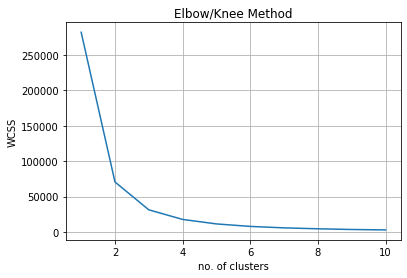

In [12]:
# Finding the optimum number of clusters by elbow method

plt.plot(range(1,11),wcss)
plt.xlabel("no. of clusters")
plt.ylabel("WCSS")
plt.title("Elbow/Knee Method")
plt.grid()
plt.show()

From the above graph we observe that at the elbow i.e in the x-axis where the number of cluster is 3, there is no significant decrement in WCSS (Within Cluster Sum of Squares). Therefore we take optimal_k (optimal no. of cluster) as 3.

In [13]:
optimal_k = 3
kmeans = KMeans(n_clusters = 3, n_init=10, max_iter=300, random_state = 0).fit(X)
y_kmeans = kmeans.labels_
print(y_kmeans)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


In [14]:
#gives counts of datapoints in each cluster
np.unique(kmeans.labels_, return_counts= True)

(array([0, 1, 2]), array([50, 50, 50], dtype=int64))

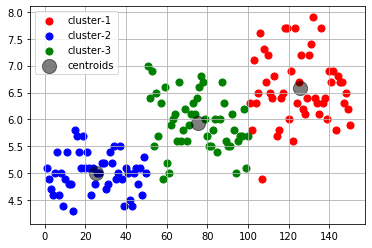

In [15]:
# Visualising the clusters - On the first two columns

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1],s=50, c='red',label= 'cluster-1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1],s=50, c='blue',label= 'cluster-2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1],s=50, c='green',label= 'cluster-3')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5, label= 'centroids');
plt.grid()
plt.legend()
plt.show()